## Imports, Paths, View Examples

In [209]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define paths
#base_dir = '/content/drive/MyDrive/logo_detection/logo_detection_w281/' # Colab/GDrive
base_dir = '/Users/jetcalz07/Desktop/MIDS/W281_CV/logo_detection_w281/'
image_dir = base_dir + 'data/images/'
os.chdir(base_dir)

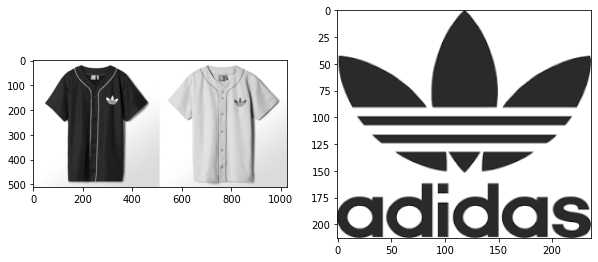

In [210]:
# Load example image and reference
adidas_dir = image_dir + 'adidas/'
img_rgb = cv2.imread(adidas_dir + os.listdir(adidas_dir)[0])
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
#plt.imshow(img, cmap='gray')

# Load adidas template
ref_dir = base_dir + 'data/logo_references/adidas/'
ref_rgb = cv2.imread(ref_dir + os.listdir(ref_dir)[0])
ref_gray = cv2.cvtColor(ref_rgb, cv2.COLOR_RGB2GRAY)
#plt.imshow(ref, cmap='gray')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_gray, cmap='gray')
ax[1].imshow(ref_gray, cmap='gray')
plt.show()

## Helper Functions

In [211]:
def find_match(img_rgb, img_gray, ref, method='cv2.TM_CCOEFF_NORMED'):
    img_copy = img_gray.copy()
    img_rgb_copy = img_rgb.copy()
    ref_copy = ref.copy()
    w, h = ref_copy.shape[::-1]
    method = eval(method)

    res = cv2.matchTemplate(img_copy, ref_copy, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
        ret_val = min_val # Need to subtract from 1 in order to compare???
    else:
        top_left = max_loc
        ret_val = max_val
    bottom_right = (top_left[0] + w, top_left[1] + h)
    rect = cv2.rectangle(img_rgb_copy, top_left, bottom_right, 255, 3)
    
    return rect, ret_val

In [212]:
# Try other shapes for reference
def resize_reference(ref, scale_percent):
    ref_copy = ref.copy()
    width = int(ref_copy.shape[1] * scale_percent)
    height = int(ref_copy.shape[0] * scale_percent)
    ref_re = cv2.resize(ref_copy, (width, height))
    return ref_re

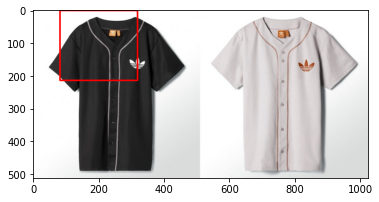

In [213]:
# Example 1
rect, val = find_match(img_rgb, img_gray, ref_gray)
plt.imshow(rect)

### Experiments
1. Resize reference image
2. Different template match methods
3. Other transformations to reference image (to do)

In [214]:
# DF to track experiment results
df = pd.DataFrame({
    'eval_metric': np.array([], dtype='float32'),
    'ref_size': np.array([]), 
    'method': np.array([])
    }
)

### Experiment 1: Resize Reference Image

[0.43907219 0.3108027  0.27194029 0.27731588]


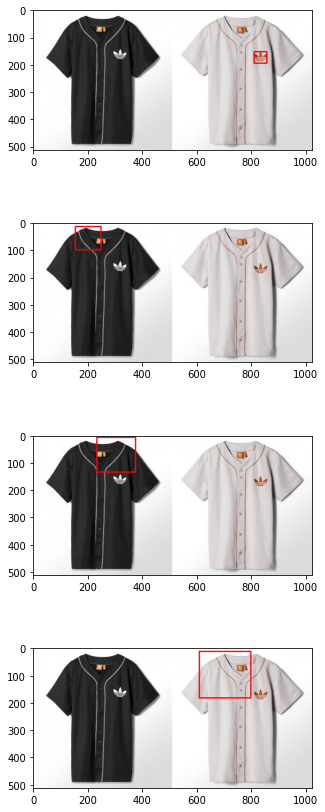

In [215]:
percs = np.arange(0.2, 0.8, 0.2)
vals = np.array([])

r_copy = ref_gray.copy()
rgb = img_rgb.copy()
gray = img_gray.copy()

fig, ax = plt.subplots(len(percs), 1, figsize=(5, 15))
for i in range(len(percs)):
    ref_resize = resize_reference(r_copy, percs[i]) # resize
    rect_res, val = find_match(rgb, gray, ref_resize) # eval
    vals = np.append(vals, val)
    df.loc[len(df.index)] = [val, ref_resize.shape, 'cv2.TM_CCOEFF_NORMED']
    ax[i].imshow(rect_res)

print(vals)

In [216]:
# check results
df.head()

,eval_metric,ref_size,method
0,0.439072,"(42, 47)",cv2.TM_CCOEFF_NORMED
1,0.310803,"(85, 94)",cv2.TM_CCOEFF_NORMED
2,0.271940,"(127, 142)",cv2.TM_CCOEFF_NORMED
3,0.277316,"(170, 189)",cv2.TM_CCOEFF_NORMED


### Experiment 2: Template Match Methods

[('cv2.TM_CCOEFF', 4848272.0), ('cv2.TM_CCOEFF_NORMED', 0.4390721917152405), ('cv2.TM_CCORR', 87728960.0), ('cv2.TM_CCORR_NORMED', 0.8960082530975342), ('cv2.TM_SQDIFF', 15631216.0), ('cv2.TM_SQDIFF_NORMED', 0.2222309708595276)]


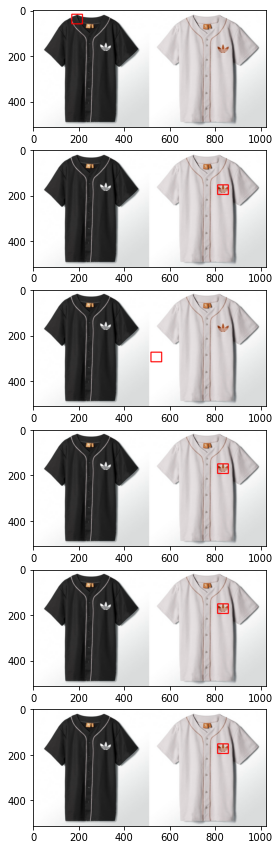

In [217]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
vals = np.array([])

fig, ax = plt.subplots(len(methods), 1, figsize=(5, 15))
for i in range(len(methods)):
    ref_resize = resize_reference(r_copy, 0.2) # resize
    rect_res, val = find_match(rgb, gray, ref_resize, methods[i]) # eval
    vals = np.append(vals, val)
    df.loc[len(df.index)] = [val, ref_resize.shape, methods[i]]
    ax[i].imshow(rect_res)

print(list(zip(methods, vals)))

In [218]:
# Find a way to compare the metrics

In [220]:
df.head(10)

,eval_metric,ref_size,method
0,4.390722e-01,"(42, 47)",cv2.TM_CCOEFF_NORMED
1,3.108027e-01,"(85, 94)",cv2.TM_CCOEFF_NORMED
2,2.719403e-01,"(127, 142)",cv2.TM_CCOEFF_NORMED
3,2.773159e-01,"(170, 189)",cv2.TM_CCOEFF_NORMED
4,4.848272e+06,"(42, 47)",cv2.TM_CCOEFF
5,4.390722e-01,"(42, 47)",cv2.TM_CCOEFF_NORMED
6,8.772896e+07,"(42, 47)",cv2.TM_CCORR
7,8.960083e-01,"(42, 47)",cv2.TM_CCORR_NORMED
8,1.563122e+07,"(42, 47)",cv2.TM_SQDIFF
9,2.222310e-01,"(42, 47)",cv2.TM_SQDIFF_NORMED
